## Customer Segmentation
Customer Segmentation is the subdivision of a market into discrete customer groups that share similar characteristics. Customer Segmentation can be a powerful means to identify unsatisfied customer needs.

About Dataset
Context:

This data set is created only for the learning purpose of the customer segmentation concepts , also known as market basket analysis . I will demonstrate this by using unsupervised ML technique (KMeans Clustering Algorithm) in the simplest form.

Content:

You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

Problem Statement:

You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
from sklearn.cluster import KMeans

In [3]:
from sklearn.preprocessing import StandardScaler

In [7]:
!pip install chart_studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 4.7 MB/s eta 0:00:00


In [8]:
import chart_studio.tools as tls
import chart_studio
import chart_studio.plotly as py

In [9]:
sc=StandardScaler()

In [10]:
df=pd.read_csv('Mall_Customers.csv')

In [11]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [13]:
df.shape

(200, 5)

In [14]:
df.drop('CustomerID',axis=1,inplace=True)

In [15]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## EDA

In [16]:
x=df['Gender'].value_counts()

<Axes: xlabel='count', ylabel='Gender'>

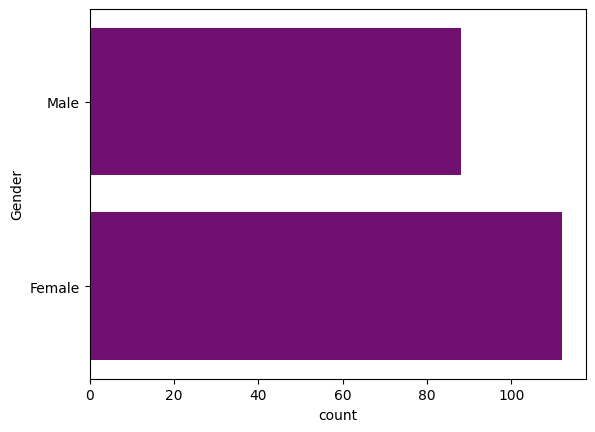

In [17]:
sns.countplot(df['Gender'],color='purple')

## EDA And Customer Segementaion According to Age and Spending Score

In [18]:
print(df['Age'].describe())

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64


In [26]:
import pandas as pd

# Assuming df is your main DataFrame with all the data
data = {'Age': [22, 34, 29, 40, 50, 22, 24, 28, 34, 50],
        'Spending Score (1-100)': [60, 70, 55, 80, 65, 75, 85, 90, 45, 50]}
df = pd.DataFrame(data)

# Define df5 and df6 as subsets of df
df5 = df.iloc[:5]  # First 5 rows
df6 = df.iloc[5:]  # Last 5 rows

In [27]:
import plotly.express as px
import plotly.graph_objects as go

# Create histogram
fig = px.histogram(df, x='Age')

# Display histogram
fig.show()

# Add scatter plot traces
fig.add_trace(
    go.Scatter(
        x=df5['Age'],
        y=df5['Spending Score (1-100)'],
        mode="markers",
        name="customer5"
    )
)

fig.add_trace(
    go.Scatter(
        x=df6['Age'],
        y=df6['Spending Score (1-100)'],
        mode="markers",
        name="customer6"
    )
)

# Show the combined plot with added traces
fig.show()

Here the mostly Customers are between 30-35 years of age

In [29]:
px.scatter(df,x='Age',y='Spending Score (1-100)',color='Age')

In [30]:
x=df[['Age','Spending Score (1-100)']]
x

,Age,Spending Score (1-100)
0,22,60
1,34,70
2,29,55
3,40,80
4,50,65
5,22,75
6,24,85
7,28,90
8,34,45
9,50,50


### Scaling all the values

In [31]:
X=sc.fit_transform(x)

### Here we have to Find Number of clusters

In [32]:
sse=[]
for i in range(1,10):
    km=KMeans(n_clusters=i)
    km.fit_predict(X)
    a=km.inertia_
    sse.append(a)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

In [33]:
a=range(1,10)
px.line(x=a,y=sse)

### min number  of clusters should be 4.

### Building the Model

In [34]:
km=KMeans(n_clusters=4)

In [35]:
prediction=km.fit_predict(X)
prediction

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([0, 1, 0, 1, 2, 3, 3, 3, 0, 2], dtype=int32)

In [36]:
df['age_cluster']=prediction

In [37]:
df.head()

,Age,Spending Score (1-100),age_cluster
0,22,60,0
1,34,70,1
2,29,55,0
3,40,80,1
4,50,65,2


In [38]:
df1=df[df['age_cluster']==0]
df2=df[df['age_cluster']==1]
df3=df[df['age_cluster']==2]
df4=df[df['age_cluster']==3]

#### Ploting the segmented graph

In [39]:
fig=go.Figure()
fig.add_trace(
    go.Scatter(
        x=df1['Age'],
        y=df1['Spending Score (1-100)'],
        mode="markers",
        name="customer1"
    ))
fig.add_trace(
    go.Scatter(
        x=df2['Age'],
        y=df2['Spending Score (1-100)'],
        mode="markers",
        name="customer2"
    ))
fig.add_trace(
    go.Scatter(
        x=df3['Age'],
        y=df3['Spending Score (1-100)'],
        mode="markers",
        name="customer3"
    ))
fig.add_trace(
    go.Scatter(
        x=df4['Age'],
        y=df4['Spending Score (1-100)'],
        mode="markers",
        name="customer4"
    ))


fig.show()

## EDA And Customer Segementaion According to Annual Income and Spending Score

In [50]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('Mall_Customers.csv')

# Display the column names
print(df.columns)

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [51]:
print(df.dtypes)

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


In [52]:
print(df['Annual Income (k$)'].describe())

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64


In [53]:
px.histogram(df,x='Annual Income (k$)')

Most people have annual income about 70-79 k dollars

In [54]:
px.scatter(df,x='Annual Income (k$)', y='Spending Score (1-100)',color='Annual Income (k$)')

In [55]:
x=df[['Annual Income (k$)','Spending Score (1-100)']]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


### Feature scaling

In [56]:
X=sc.fit_transform(x)

### Finding Number of Cluster

In [57]:
sse=[]
for i in range(1,10):
    km=KMeans(n_clusters=i)
    km.fit_predict(X)
    p=km.inertia_
    sse.append(p)
sse

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

[400.00000000000006,
 270.11349874246787,
 157.7040081503594,
 108.92131661364358,
 65.56840815571681,
 55.057348270386015,
 44.91118554999014,
 37.229927310461804,
 32.82802898718322]

In [58]:
a=range(1,10)
px.line(x=a,y=sse)

### It  can be seen from the plot that there will be 5 clusters

### Building the model

In [59]:
km=KMeans(n_clusters=5)

In [60]:
prediction=km.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [61]:
df['salary_cluster']=prediction

In [62]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),salary_cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,1
2,3,Female,20,16,6,4
3,4,Female,23,16,77,1
4,5,Female,31,17,40,4


In [63]:
df1=df[df['salary_cluster']==0]
df2=df[df['salary_cluster']==1]
df3=df[df['salary_cluster']==2]
df4=df[df['salary_cluster']==3]
df5=df[df['salary_cluster']==4]

### Ploting The segmeted graph

In [76]:
import plotly.graph_objects as go

fig = go.Figure()

for i in range(1, 6):
    df = globals()[f"df{i}"]
    fig.add_trace(
        go.Scatter(
            x=df['Annual Income (k$)'],
            y=df['Spending Score (1-100)'],
            mode="markers",
            name=f"customer{i}"
        )
    )

fig.show()

## Customer Segementaion According to Age, Annual Income and Spending Score

In [65]:
x=df[['Annual Income (k$)','Age','Spending Score (1-100)']]
x

,Annual Income (k$),Age,Spending Score (1-100)
0,15,19,39
1,15,21,81
2,16,20,6
3,16,23,77
4,17,31,40
...,...,...,...
195,120,35,79
196,126,45,28
197,126,32,74
198,137,32,18


### Scaling the values

In [66]:
X=sc.fit_transform(x)

### Finding Numeber of clusters

In [67]:
sse=[]
for i in range(1,10):
    km=KMeans(n_clusters=i)
    km.fit_predict(X)
    p=km.inertia_
    sse.append(p)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

In [68]:
a=range(1,10)
px.line(x=a,y=sse)

### It can be seen the number of clusters are 6

### Building the model

In [69]:
km=KMeans(n_clusters=6)

In [70]:
prediction=km.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [71]:
df['all_cluster']=prediction

In [72]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),salary_cluster,all_cluster
0,1,Male,19,15,39,4,5
1,2,Male,21,15,81,1,5
2,3,Female,20,16,6,4,3
3,4,Female,23,16,77,1,5
4,5,Female,31,17,40,4,3


In [73]:
df1=df[df['all_cluster']==0]
df2=df[df['all_cluster']==1]
df3=df[df['all_cluster']==2]
df4=df[df['all_cluster']==3]
df5=df[df['all_cluster']==4]
df6=df[df['all_cluster']==5]

In [77]:
import plotly.graph_objects as go

fig = go.Figure()

for i in range(1, 7):
    df = globals()[f"df{i}"]
    fig.add_trace(
        go.Scatter3d(
            x=df['Annual Income (k$)'],
            y=df['Age'],
            z=df['Spending Score (1-100)'],
            mode="markers",
            name=f"customer{i}"
        )
    )

fig.show()